# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2  столбика данных по формулам:
1) $N $%$ 5$
2) $N^2 $%$ 5 + 5$
где $N$ - номер в списке

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv("students_simple.csv")

In [5]:
N = 14
N1 = N % 5
N2 = (N ** 2) % 5 + 5
N1, N2

(4, 6)

In [7]:
col1 = data.columns[4] 
col2 = data.columns[6]
col1, col2

('pages', 'bmi')

In [9]:
my_data = data.iloc[:, [N1, N2]]
display(my_data)
x = my_data.iloc[:, 0]
y = my_data.iloc[:, 1]

,pages,bmi
0,24,3.533
1,32,2.623
2,24,2.875
3,24,3.375
4,60,3.000
5,16,2.828
6,90,3.255
7,24,2.726
8,48,2.429
9,24,2.361


## 1. Расчет корреляций
### 1. Фехнера

In [12]:
def fechner_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sign_x =  np.sign(x - x_mean)
    sign_y =  np.sign(y - y_mean)
    matches = np.sum(sign_x * sign_y > 0)
    mismatches = np.sum(sign_x * sign_y < 0)
    fechner = (matches - mismatches) / (matches + mismatches)
    return fechner

In [14]:
print(f"Корреляция Фехнера : {fechner_corr(x,y)}")


Корреляция Фехнера : -0.4


### 2. Пирсона + доверительный интервал

In [17]:
pearson_r, pearson_p = stats.pearsonr(x, y)
pearson_r

-0.17949732800721202

In [19]:
def pearson_corr(x,y) -> float:
    x_mean: float = np.mean(x)
    y_mean: float = np.mean(y)
    numerator: float = np.sum((x - x_mean) * (y - y_mean))
    denominator: float = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [21]:
print(f"Корреляция Пирсона : {pearson_corr(x,y)}")

Корреляция Пирсона : -0.17949732800721208


In [23]:
def confidence_interval(x, y, confidence_level = 0.95):
    r = pearson_corr(x, y)
    z = np.arctanh(r)
    n = len(x)
    se_z = 1 / np.sqrt(n - 3)
    quantile = stats.norm.ppf((1 + confidence_level) / 2) 
    z_lower = z - quantile * (1 / np.sqrt(n - 3))
    z_upper = z + quantile * (1 / np.sqrt(n - 3))
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return (r_lower, r_upper)

In [25]:
left_bound, right_bound = confidence_interval(x, y)
print(f"95% доверительный интервал: [{left_bound:.3f}, {right_bound:.3f}]")

95% доверительный интервал: [-0.576, 0.286]


### 3. Спирмена

In [28]:
spearman_r, spearman_p = stats.spearmanr(x, y)
spearman_r

-0.32393997826548077

In [30]:
def spearman_corr(x, y) -> float:
    n = len(x)
    rank_x = x.rank(method='average')
    rank_y = y.rank(method='average')
    diff = rank_x - rank_y
    corr = 1 - (6 * np.sum(diff**2)) / (n*(n**2-1))
    return corr

In [32]:
print(f"Корреляция Спирмена: {spearman_corr(x, y)}")

Корреляция Спирмена: -0.30000000000000004


#### пупупу, что-то не то

![Формулка из интернета](img2.png)

In [36]:
def spearman_corr(x, y) -> float:
    rank_x = x.rank(method='average')
    rank_y = y.rank(method='average')
    corr = pearson_corr(rank_x, rank_y)
    return corr

In [38]:
print(f"Корреляция Спирмена: {spearman_corr(x, y)}")

Корреляция Спирмена: -0.3239399782654808


In [40]:
def t_st(r, n):
    return (r * np.sqrt(n-1))/(np.sqrt(1-r**2))

In [42]:
print(f"t-критерий Стьюдента,: {t_st(spearman_corr(x, y), len(x))}")

t-критерий Стьюдента,: -1.4925008028477775


### 4. Кенделла

In [45]:
kendall_tau, kendall_p = stats.kendalltau(x, y)
kendall_tau

-0.24423934661177393

In [47]:
import math
def kendell_corr(x, y):
    n = len(x)
    concordant = 0   
    discordant = 0 

    for i in range(n):
        for j in range(i + 1, n):
            dx = x[i] - x[j]
            dy = y[i] - y[j]
            sgn_x = math.copysign(1, dx) if dx != 0 else 0
            sgn_y = math.copysign(1, dy) if dy != 0 else 0

            if sgn_x * sgn_y > 0:
                concordant += 1
            elif sgn_x * sgn_y < 0:
                discordant += 1

    corr = 2 * (concordant - discordant) / (n * (n - 1))
    return corr

In [49]:
print(f"Корреляция Кенделла: {kendell_corr(x, y)}")

Корреляция Кенделла: -0.22631578947368422


In [51]:
def kendall_tau_b(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n = x.size

    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0
    for i in range(n - 1):
        dx = x[i + 1:] - x[i]
        dy = y[i + 1:] - y[i]
        sx = np.sign(dx)
        sy = np.sign(dy)
        ties_x += np.sum(sx == 0)
        ties_y += np.sum(sy == 0)
        mask = (sx != 0) & (sy != 0)
        sxy = sx[mask] * sy[mask]

        concordant += np.sum(sxy > 0)
        discordant += np.sum(sxy < 0)

    n0 = n * (n - 1) // 2
    denom = math.sqrt((n0 - ties_x) * (n0 - ties_y))

    if denom == 0:
        return np.nan

    tau = (concordant - discordant) / denom
    return tau


In [53]:
print(f"Корреляция Кенделла: {kendall_tau_b(x, y)}")

Корреляция Кенделла: -0.24423934661177393


In [55]:
data = {
    'Метод': ['Фехнера', 'Пирсона', 'Спирмена', 'Кендалла'],
    'Коэффициент': [
        fechner_corr(x, y),
        pearson_corr(x, y),
        spearman_corr(x, y),
        kendall_tau_b(x, y)
    ]
}
df = pd.DataFrame(data)
display(df)

,Метод,Коэффициент
0,Фехнера,-0.400000
1,Пирсона,-0.179497
2,Спирмена,-0.323940
3,Кендалла,-0.244239


### Вывод: 
Все четыре коэффициента корреляции показывают слабую отрицательную зависимость между переменными pages и BMI. Значения находятся в диапазоне от –0.18 до –0.40, что означает: при увеличении количества страниц (pages) наблюдается тенденция к небольшому снижению BMI, однако связь не является сильной и, вероятно, неустойчива. Различия между методами объясняются тем, что Пирсон оценивает линейную, а Спирмен и Кендалл — монотонную (по рангам) зависимость, при этом Фехнер даёт более грубую оценку только направления связи.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [59]:
def hist(data, feature_name="Признак"):
    plt.hist(data, bins=10, edgecolor='black', color='violet', alpha=0.9)
    plt.title("Гистограмма", fontsize=14)
    plt.xlabel(feature_name, fontsize=14) 
    plt.ylabel("Частота", fontsize=14)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

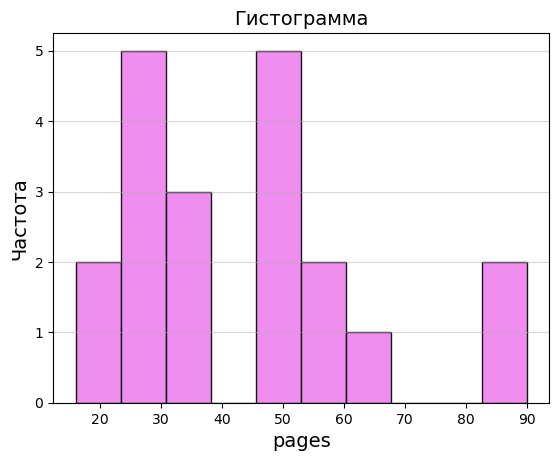

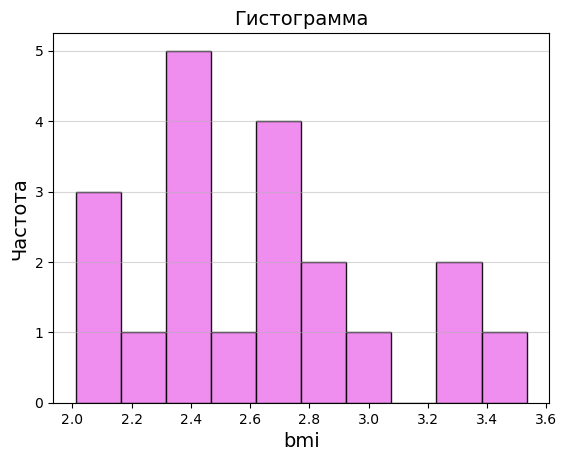

In [61]:
hist(x, "pages")
hist(y, "bmi")

In [63]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.9, s=50)
    plt.title("Scatter Plot", fontsize=14, fontweight='bold')
    plt.xlabel("Pages", fontsize=12)
    plt.ylabel("BMI", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

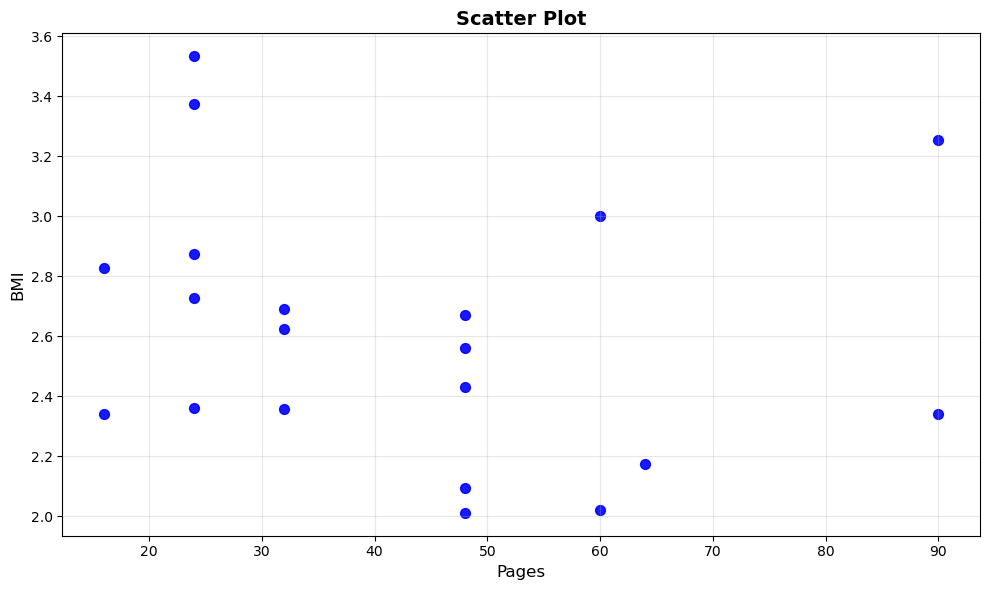

In [65]:
scatter_plot(x, y)

### Вывод
На диаграмме рассеяния видно, что между переменными Pages (количество страниц) и BMI (индекс массы тела) отсутствует выраженная линейная зависимость: точки распределены хаотично, без чёткого восходящего или нисходящего тренда. Можно заметить слабую тенденцию к отрицательной связи — при увеличении количества страниц значения BMI слегка снижаются, однако эта закономерность неустойчива. Рассеивание точек указывает на высокую вариативность данных и отсутствие чёткой функциональной зависимости, что соответствует рассчитанным коэффициентам корреляции, показывающим слабую отрицательную связь между показателями.

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:

In [69]:
def plot_model(title, y_pred, eq_text, color='red'):
    plt.figure(figsize=(9, 6))
    plt.scatter(x, y, c='blue', s=50, alpha=0.8, label='Данные')
    plt.plot(x_range, y_pred, color=color, lw=2, label='Модель')
    plt.text(0.97, 0.03, eq_text, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=11, color=color,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel("Pages"); plt.ylabel("BMI")
    plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array(x).flatten()
y = np.array(y).flatten()

X = x.reshape(-1, 1)
x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

### 1. линейная, $y=w_1 x + w_0$

In [74]:
model_lin = LinearRegression().fit(X, y)
w1_lin, w0_lin = model_lin.coef_[0], model_lin.intercept_
y_pred_lin = model_lin.predict(x_range)
r2_lin = model_lin.score(X, y)

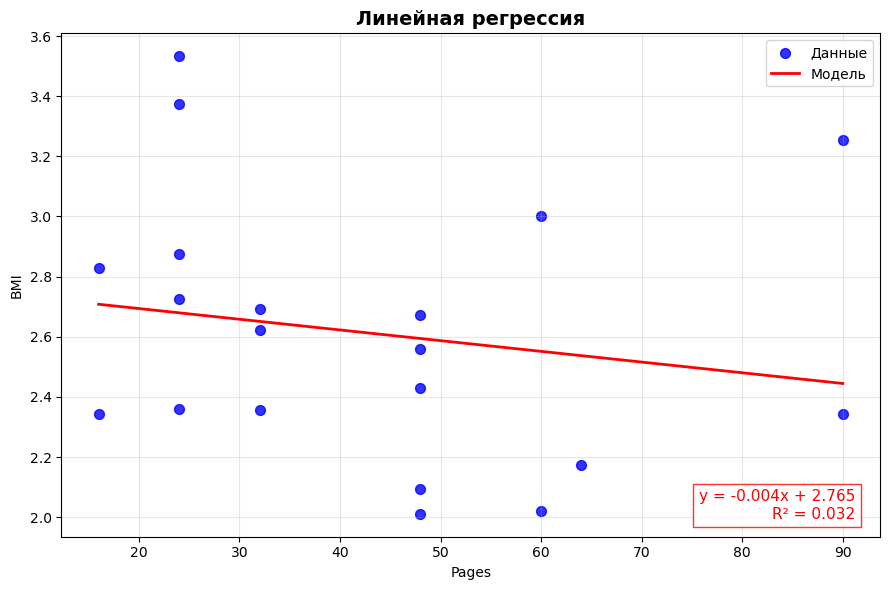

In [76]:
 plot_model("Линейная регрессия",
           y_pred_lin,
           f"y = {w1_lin:.3f}x + {w0_lin:.3f}\nR² = {r2_lin:.3f}")

### 2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$

In [79]:
X_quad = np.column_stack((x**2, x))
model_quad = LinearRegression().fit(X_quad, y)
w2, w1_quad = model_quad.coef_
w0_quad = model_quad.intercept_
x_range_quad = np.column_stack((x_range**2, x_range))
y_pred_quad = model_quad.predict(x_range_quad)
r2_quad = model_quad.score(X_quad, y)

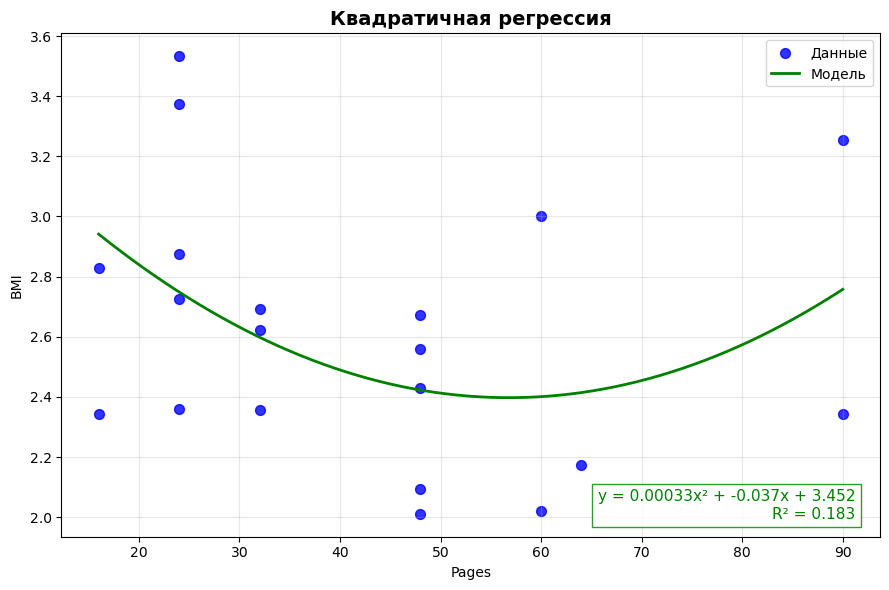

In [81]:
plot_model("Квадратичная регрессия",
           y_pred_quad,
           f"y = {w2:.5f}x² + {w1_quad:.3f}x + {w0_quad:.3f}\nR² = {r2_quad:.3f}",
           color='green')

### 3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 

In [84]:
X_hyp = (1 / x).reshape(-1, 1)
model_hyp = LinearRegression().fit(X_hyp, y)
w1_hyp, w0_hyp = model_hyp.coef_[0], model_hyp.intercept_
x_range_hyp = (1 / x_range)
y_pred_hyp = model_hyp.predict(x_range_hyp)
r2_hyp = model_hyp.score(X_hyp, y)

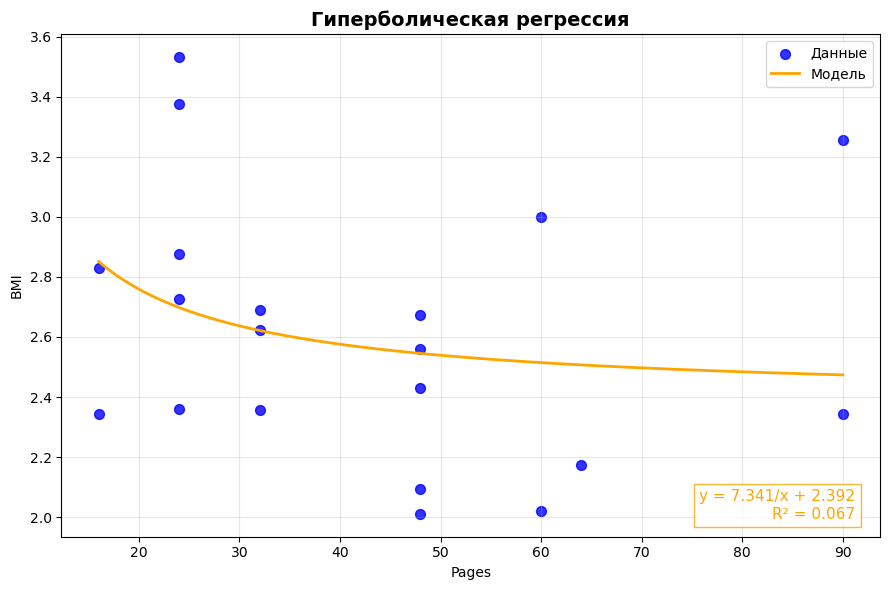

In [86]:
plot_model("Гиперболическая регрессия",
           y_pred_hyp,
           f"y = {w1_hyp:.3f}/x + {w0_hyp:.3f}\nR² = {r2_hyp:.3f}",
           color='orange')

### 4. показательная, $y = w_1^x \cdot w_0$

In [89]:
y_log = np.log(y)
model_exp = LinearRegression().fit(X, y_log)
ln_w1, ln_w0 = model_exp.coef_[0], model_exp.intercept_
w1_exp, w0_exp = np.exp(ln_w1), np.exp(ln_w0)
y_pred_exp = w0_exp * (w1_exp ** x_range.flatten())
r2_exp = model_exp.score(X, y_log)

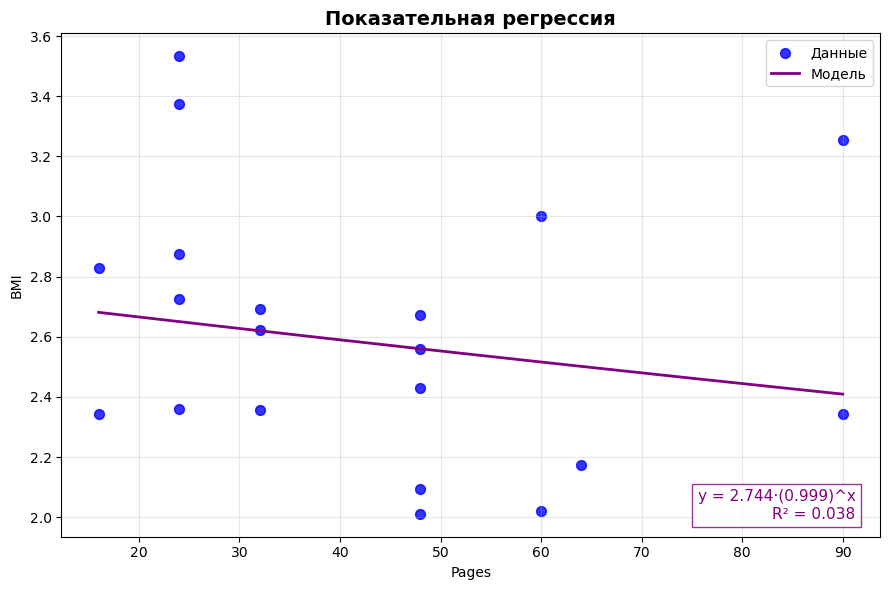

In [91]:
plot_model("Показательная регрессия",
           y_pred_exp,
           f"y = {w0_exp:.3f}·({w1_exp:.3f})^x\nR² = {r2_exp:.3f}",
           color='purple')

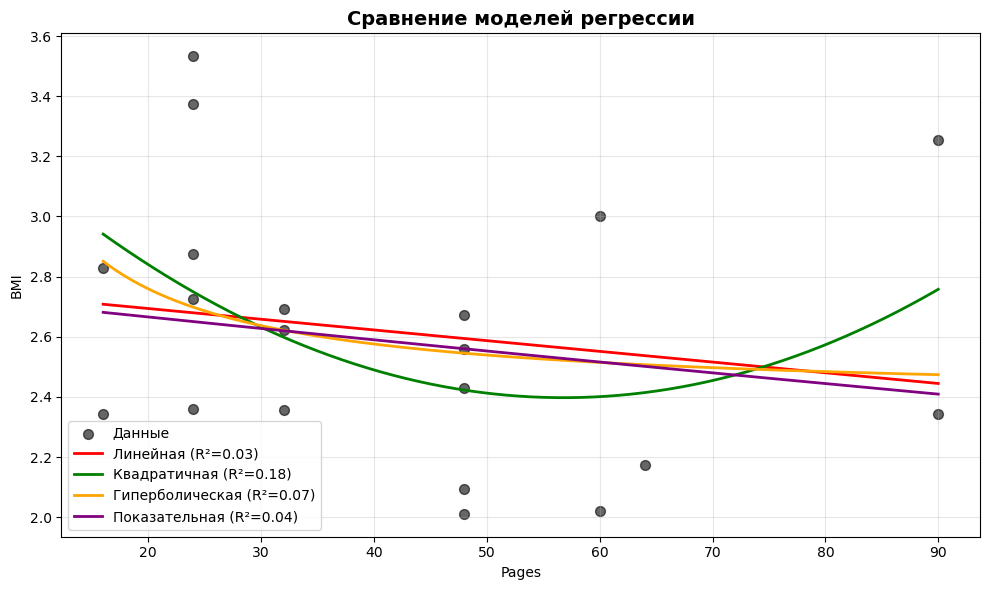

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='black', s=50, alpha=0.6, label='Данные')
plt.plot(x_range, y_pred_lin, 'r-', lw=2, label=f"Линейная (R²={r2_lin:.2f})")
plt.plot(x_range, y_pred_quad, 'g-', lw=2, label=f"Квадратичная (R²={r2_quad:.2f})")
plt.plot(x_range, y_pred_hyp, color='orange', lw=2, label=f"Гиперболическая (R²={r2_hyp:.2f})")
plt.plot(x_range, y_pred_exp, color='purple', lw=2, label=f"Показательная (R²={r2_exp:.2f})")

plt.title("Сравнение моделей регрессии", fontsize=14, weight='bold')
plt.xlabel("Pages"); plt.ylabel("BMI")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

In [98]:
from scipy.stats import f
def fisher_test(model_name, y_true, y_pred, k_params, alpha=0.05):
    n = len(y_true)
    y_mean = np.mean(y_true)
    TSS = np.sum((y_true - y_mean)**2)           
    RSS = np.sum((y_true - y_pred)**2)           
    ESS = TSS - RSS                             

    df_regression = k_params
    df_residual = n - k_params - 1
    MS_regression = ESS / df_regression
    MS_residual = RSS / df_residual

    F_statistic = MS_regression / MS_residual
    F_critical = f.ppf(1 - alpha, df_regression, df_residual)
    p_value = 1 - f.cdf(F_statistic, df_regression, df_residual)
    R2 = ESS / TSS

    return {
        "Модель": model_name,
        "R²": round(R2, 4),
        "F": round(F_statistic, 4),
        "F_кр": round(F_critical, 4),
        "p-value": round(p_value, 5),
        "Вывод": "Значима" if F_statistic > F_critical else "Незначима"
    }

results = []

y_pred_lin = model_lin.predict(x.reshape(-1, 1))
y_pred_quad = model_quad.predict(np.column_stack((x**2, x)))
y_pred_hyp = model_hyp.predict((1/x).reshape(-1, 1))
y_pred_exp = np.exp(model_exp.predict(x.reshape(-1, 1))) 
results.append(fisher_test("Линейная", y, y_pred_lin, k_params=1))
results.append(fisher_test("Квадратичная", y, y_pred_quad, k_params=2))
results.append(fisher_test("Гиперболическая", y, y_pred_hyp, k_params=1))
results.append(fisher_test("Показательная", y, y_pred_exp, k_params=1))

df_fisher = pd.DataFrame(results)
display(df_fisher)

,Модель,R²,F,F_кр,p-value,Вывод
0,Линейная,0.0322,0.5993,4.4139,0.44891,Незначима
1,Квадратичная,0.1830,1.9036,3.5915,0.17947,Незначима
2,Гиперболическая,0.0670,1.2924,4.4139,0.27051,Незначима
3,Показательная,0.0289,0.5358,4.4139,0.47360,Незначима


In [ ]:
best_model = df_fisher.loc[df_fisher["R²"].idxmax()]
worst_model = df_fisher.loc[df_fisher["R²"].idxmin()]
print(f"\nНаилучшая модель: {best_model['Модель']} (R² = {best_model['R²']:.4f}) — {best_model['Вывод']}")
print(f"📉 Наихудшая модель: {worst_model['Модель']} (R² = {worst_model['R²']:.4f}) — {worst_model['Вывод']}")

### Вывод
Проверка моделей по критерию Фишера показала, что все четыре вида регрессий — линейная, квадратичная, гиперболическая и показательная — оказались статистически незначимыми на уровне значимости 0.05. Во всех случаях значение критерия F оказалось меньше критического, а p-value > 0.05, что указывает на отсутствие достаточных оснований считать модели адекватными. Таким образом, полученные уравнения не отражают существенной зависимости между переменными, и описываемая связь между ними является слабой